<a href="https://colab.research.google.com/github/oriyash88/CarsModelClassification/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Basics of deep learning
Hello dear students,<br> This is the template notebook. Please copy it into your drive.

---
<br>**Student 1:**

Name: Oriya Sharabi

ID: 318866076

<br>  **Student 2:**

Name: Noa Ben Sael

ID: 208933440

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/20733/logos/header.png?t=2020-05-14-08-44-45">

# Utils

## Import Libraries

In [ ]:
%%capture
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, Dropout, Convolution2DTranspose, Reshape, Flatten
from keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from keras.utils import load_img
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.applications.vgg16 import VGG16
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1DS_5kLbzYYzMWtp1WP3x_hxtRBhroJID

# images
!gdown --id 1zIXVoOjr5VYiOAIaSATN35VFjaLMEacW
!gdown --id 1ZTKaxKlSgvnZQt96zXkrIwRSNdKkpvdu
!gdown --id 1Jf50yZzhMSf-CYipunto6XU0lBy_nnib
#the best model
!gdown --id 1WlEfU8O_XNhopxPt-lZL-vVDlYE2c9_U

## Dataset
Cars196 - 196 different classes of vehicles

### Download Data

In [ ]:
#%%capture
#cars196 = tfds.load('Cars196', as_supervised=True, shuffle_files=True)

In [ ]:
cars_train, cars_test = tfds.load('Cars196', split=['train + test[:4041]', 'test[4041:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteK33DIW/cars196-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteK33DIW/cars196-test.tfrecord*...:   0%|          |…

Dataset cars196 downloaded and prepared to /root/tensorflow_datasets/cars196/2.1.0. Subsequent calls will reuse this data.


In [ ]:
cars_train = cars_train.map(lambda x: (x['image'], x['label']))
cars_test = cars_test.map(lambda x: (x['image'], x['label']))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Dictionary of the labels - maps between the label (int) number and the vehicle model (str)

In [ ]:
label_dic = pd.read_csv('/content/labels_dic.csv', header=None, dtype={0: str}).set_index(0).squeeze().to_dict()

In [ ]:
print(label_dic)

{nan: 'Cars Model', '0': 'AM General Hummer SUV 2000', '1': 'Acura RL Sedan 2012', '2': 'Acura TL Sedan 2012', '3': 'Acura TL Type-S 2008', '4': 'Acura TSX Sedan 2012', '5': 'Acura Integra Type R 2001', '6': 'Acura ZDX Hatchback 2012', '7': 'Aston Martin V8 Vantage Convertible 2012', '8': 'Aston Martin V8 Vantage Coupe 2012', '9': 'Aston Martin Virage Convertible 2012', '10': 'Aston Martin Virage Coupe 2012', '11': 'Audi RS 4 Convertible 2008', '12': 'Audi A5 Coupe 2012', '13': 'Audi TTS Coupe 2012', '14': 'Audi R8 Coupe 2012', '15': 'Audi V8 Sedan 1994', '16': 'Audi 100 Sedan 1994', '17': 'Audi 100 Wagon 1994', '18': 'Audi TT Hatchback 2011', '19': 'Audi S6 Sedan 2011', '20': 'Audi S5 Convertible 2012', '21': 'Audi S5 Coupe 2012', '22': 'Audi S4 Sedan 2012', '23': 'Audi S4 Sedan 2007', '24': 'Audi TT RS Coupe 2012', '25': 'BMW ActiveHybrid 5 Sedan 2012', '26': 'BMW 1 Series Convertible 2012', '27': 'BMW 1 Series Coupe 2012', '28': 'BMW 3 Series Sedan 2012', '29': 'BMW 3 Series Wagon 2

### Function - Plot Single Example
This function receives an image and a label and it will display it on a plot

In [ ]:
def plot_single_example(image, label, label_dic=label_dic):
  car_model_by_label = label_dic[str(label)]
  plt.title(f'Image Label: {car_model_by_label} ({label})')
  plt.imshow(image)

# Data Preprocessing

### Split Dataset
Train set contains 8041 examples<br>
Test set contains 8144 examples<br>

Changing the ratio between the train_set and the test_set 

Now: 12185 in the train_set and 4000 in the test_set


In [ ]:
print(len(cars_train))
print(len(cars_test))

12185
4000


###Resize all images to uniform size and cast to int

In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) 
    image = tf.image.random_flip_left_right(image)
    image = tf.cast(image, tf.uint8)
    return image, label

cars_train = cars_train.map(preprocess).batch(16)
cars_test = cars_test.map(preprocess).batch(16)

### Example
Random example from the data set

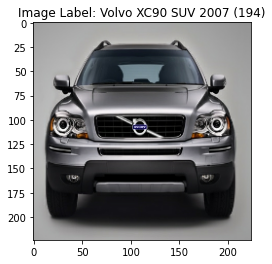

In [ ]:
image, label = cars_train.as_numpy_iterator().next()


plot_single_example(image, label)

#Ex_1

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3)) 

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(196,activation='softmax')(x) 

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in model.layers[:-1]:
    layer.trainable=False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(cars_train,validation_data=cars_test, epochs=5)

Epoch 1/5
762/762 [==============================] - 33s 41ms/step - loss: 23.2095 - accuracy: 0.1643 - val_loss: 19.8222 - val_accuracy: 0.2470
Epoch 2/5
762/762 [==============================] - 34s 44ms/step - loss: 12.6060 - accuracy: 0.4224 - val_loss: 16.9518 - val_accuracy: 0.3343
Epoch 3/5
762/762 [==============================] - 31s 40ms/step - loss: 7.7384 - accuracy: 0.5773 - val_loss: 14.8138 - val_accuracy: 0.3812
Epoch 4/5
762/762 [==============================] - 33s 44ms/step - loss: 5.2722 - accuracy: 0.6652 - val_loss: 15.5475 - val_accuracy: 0.3783
Epoch 5/5
762/762 [==============================] - 31s 40ms/step - loss: 3.6489 - accuracy: 0.7303 - val_loss: 14.6355 - val_accuracy: 0.4110


##EX_1 - Model performance

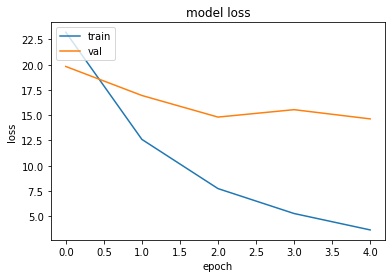

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

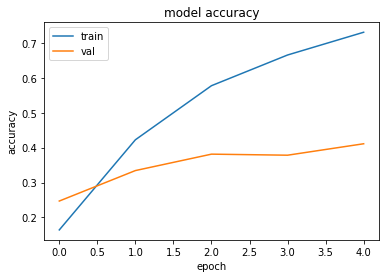

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {int(accuracy*100)}'+ '%')

The model accuracy is: 41%


In [ ]:
for key, val in history.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 3.65
accuracy : 0.73
val_loss : 14.64
val_accuracy : 0.41


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model.predict(cars_test).argmax(axis=1)
print(y_pred)
# Get true classes for the test dataset
y_true = np.concatenate([y for x, y in cars_test], axis=0)
print(y_true)
# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

250/250 [==============================] - 10s 39ms/step
[  5 103   4 ...  61 113 105]
[158 101 134 ... 118 113 121]
Precision: 0.58
Recall: 0.41
F1 score: 0.40


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#EX_2

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = x = Dropout(0.5)(x)
preds=Dense(196,activation='softmax')(x) 

In [ ]:
model_2=Model(inputs=base_model.input,outputs=preds)
for layer in model_2.layers[:-2]:
    layer.trainable=False

In [ ]:
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(cars_train,validation_data=cars_test, epochs=5)

Epoch 1/5
762/762 [==============================] - 36s 44ms/step - loss: 4.7618 - accuracy: 0.0908 - val_loss: 3.1012 - val_accuracy: 0.2780
Epoch 2/5
762/762 [==============================] - 31s 41ms/step - loss: 2.9858 - accuracy: 0.2934 - val_loss: 2.5053 - val_accuracy: 0.3950
Epoch 3/5
762/762 [==============================] - 31s 41ms/step - loss: 2.3642 - accuracy: 0.4147 - val_loss: 2.2254 - val_accuracy: 0.4495
Epoch 4/5
762/762 [==============================] - 30s 40ms/step - loss: 2.0334 - accuracy: 0.4755 - val_loss: 2.0444 - val_accuracy: 0.4915
Epoch 5/5
762/762 [==============================] - 31s 41ms/step - loss: 1.8156 - accuracy: 0.5296 - val_loss: 1.9970 - val_accuracy: 0.4922


##EX_2 - Model performance

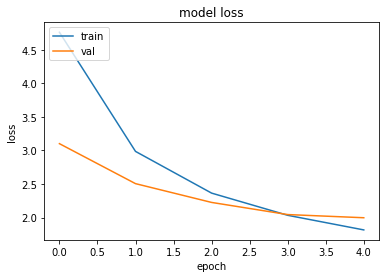

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

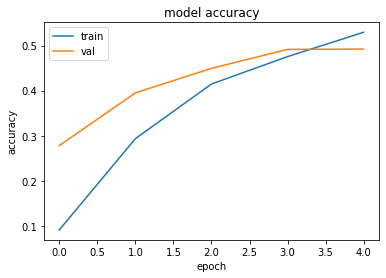

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history_2.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy*100}'+ '%')

The model accuracy is: 49.0%


In [ ]:
for key, val in history_2.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 1.82
accuracy : 0.53
val_loss : 2.0
val_accuracy : 0.49


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model_2.predict(cars_test).argmax(axis=1)
print(y_pred)
# Get true classes for the test dataset
y_true = np.concatenate([y for x, y in cars_test], axis=0)
print(y_true)
# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

250/250 [==============================] - 8s 31ms/step
[180 103 134 ... 118 113  53]
[158 101 134 ... 118 113 121]
Precision: 0.62
Recall: 0.49
F1 score: 0.49


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Ex_3

tf.keras.applications.ResNet152V2

In [ ]:
base_model_3 = tf.keras.applications.EfficientNetV2S(weights='imagenet',include_top=False,input_shape=(224,224,3)) 

82420632/82420632 [==============================] - 0s 0us/step


In [ ]:
model_3 = keras.Sequential([
    base_model_3,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(196, activation='softmax')
])

In [ ]:
for layer in base_model_3.layers[:-7]:
    layer.trainable = False

for layer in base_model_3.layers[-7:]:
    layer.trainable = True

In [ ]:
model_3.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history_3 = model_3.fit(cars_train,validation_data=cars_test,epochs=20, callbacks=[callback])

Epoch 1/20
762/762 [==============================] - 49s 35ms/step - loss: 3.3610 - accuracy: 0.2158 - val_loss: 2.1674 - val_accuracy: 0.4268
Epoch 2/20
762/762 [==============================] - 24s 31ms/step - loss: 1.9431 - accuracy: 0.4926 - val_loss: 1.5640 - val_accuracy: 0.5780
Epoch 3/20
762/762 [==============================] - 25s 33ms/step - loss: 1.3769 - accuracy: 0.6295 - val_loss: 1.3110 - val_accuracy: 0.6335
Epoch 4/20
762/762 [==============================] - 24s 31ms/step - loss: 1.0647 - accuracy: 0.7154 - val_loss: 1.1613 - val_accuracy: 0.6712
Epoch 5/20
762/762 [==============================] - 24s 31ms/step - loss: 0.8450 - accuracy: 0.7751 - val_loss: 1.0752 - val_accuracy: 0.6975
Epoch 6/20
762/762 [==============================] - 24s 31ms/step - loss: 0.6940 - accuracy: 0.8128 - val_loss: 1.0301 - val_accuracy: 0.7092
Epoch 7/20
762/762 [==============================] - 23s 30ms/step - loss: 0.5864 - accuracy: 0.8391 - val_loss: 1.0516 - val_accuracy:

##EX_3 - Model performance

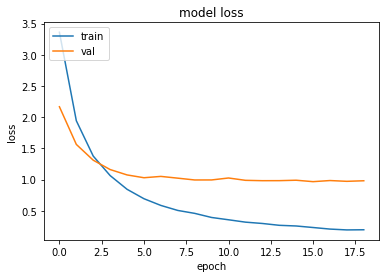

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

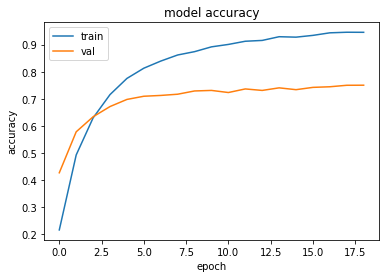

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history_3.history['val_accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy*100}'+ '%')

The model accuracy is: 75.0%


In [ ]:
for key, val in history_3.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.2
accuracy : 0.95
val_loss : 0.98
val_accuracy : 0.75


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes for the test dataset
y_pred = model_3.predict(cars_test).argmax(axis=1)
print(y_pred)

# Get true classes for the test dataset
y_true = np.concatenate([y for x, y in cars_test], axis=0)
print(y_true)

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')

250/250 [==============================] - 10s 30ms/step
[ 62 101 136 ...  63 113 121]
[158 101 134 ... 118 113 121]
Precision: 0.77
Recall: 0.74
F1 score: 0.74


##save the model

In [ ]:
%%script echo skipping
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%script echo skipping
model_3.save('/content/Transfer_learning_Model.h5')

##Test environment

To run this Test environment run "import" first in the top of this notebook

##upload the model

In [ ]:
best_model = tf.keras.models.load_model('/content/Transfer_learning_Model.h5')

In [ ]:
from google.colab import files
from numpy import load as load_npy
uploaded = files.upload()
image_path = '/content/' + list(uploaded.keys())[0]

Saving Ferrari.png to Ferrari.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_image(img_path, show=False):
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224, 3))
    img_tensor = tf.keras.utils.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    img_tensor /= 255. 

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

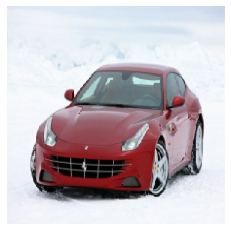

1/1 [==============================] - 0s 51ms/step
100
Ferrari FF Coupe 2012


In [ ]:
label_dic = pd.read_csv('/content/labels_dic.csv', header=None, dtype={0: str}).set_index(0).squeeze().to_dict()
img = prepare_image(image_path, show=True)
img *= 255.

pred = best_model.predict(img)
class_id = np.argmax(pred)
print(class_id)
print(label_dic[str(pred.argmax())])